# Classification model

# Pima Diabetes dataset

Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action = 'ignore')


# Exploring the data

In [3]:
d=pd.read_csv("diabetes.csv")
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
d.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
d.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#                                 Data Visualization

# Distribution of Non target variables

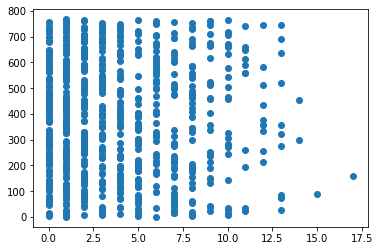

In [6]:
plt.scatter(y=range(0,len(d)),x=d['Pregnancies'])

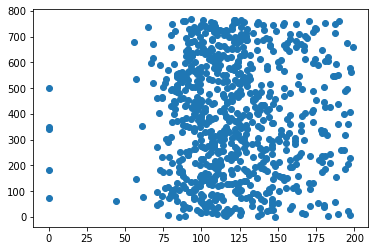

In [7]:
plt.scatter(y=range(0,len(d)),x=d['Glucose'])

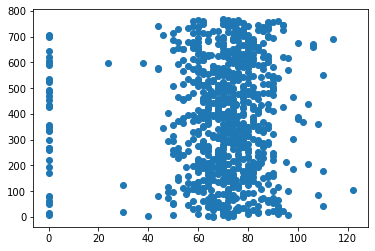

In [8]:
plt.scatter(y=range(0,len(d)),x=d['BloodPressure'])

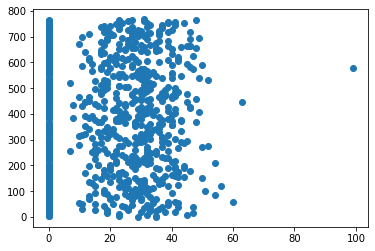

In [9]:
plt.scatter(y=range(0,len(d)),x=d['SkinThickness'])

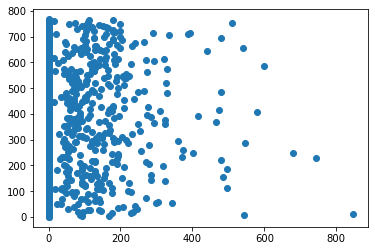

In [10]:
plt.scatter(y=range(0,len(d)),x=d['Insulin'])

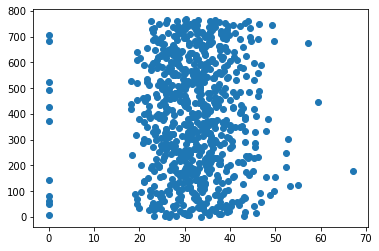

In [11]:
plt.scatter(y=range(0,len(d)),x=d['BMI'])

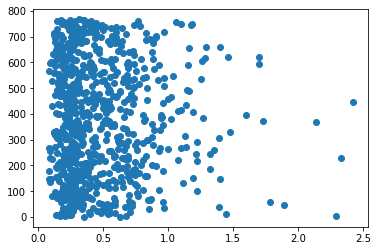

In [12]:
plt.scatter(y=range(0,len(d)),x=d['DiabetesPedigreeFunction'])

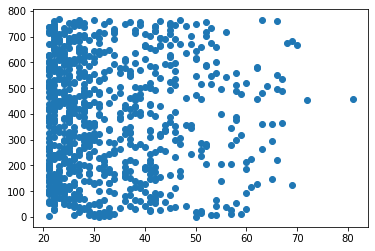

In [13]:
plt.scatter(y=range(0,len(d)),x=d['Age'])

# Relation between Non target variable and Target variable(Outcome)

<AxesSubplot:xlabel='Pregnancies', ylabel='Density'>

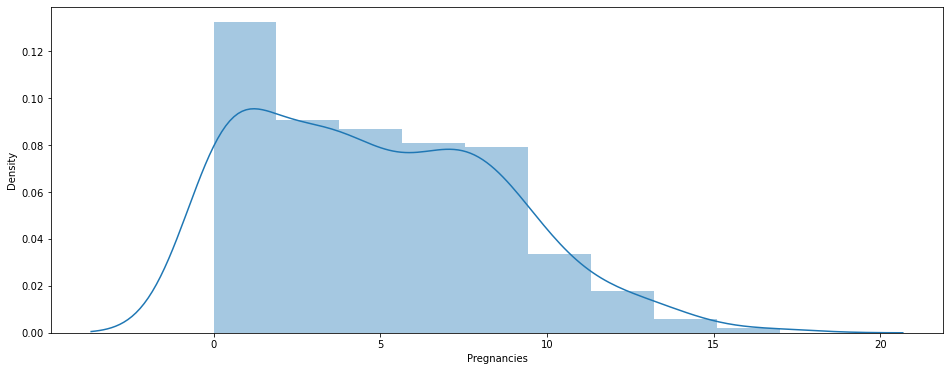

In [14]:
fig=plt.figure(figsize=(16,6))
sns.distplot(d['Pregnancies'][d['Outcome']==1])

<AxesSubplot:xlabel='Glucose', ylabel='Density'>

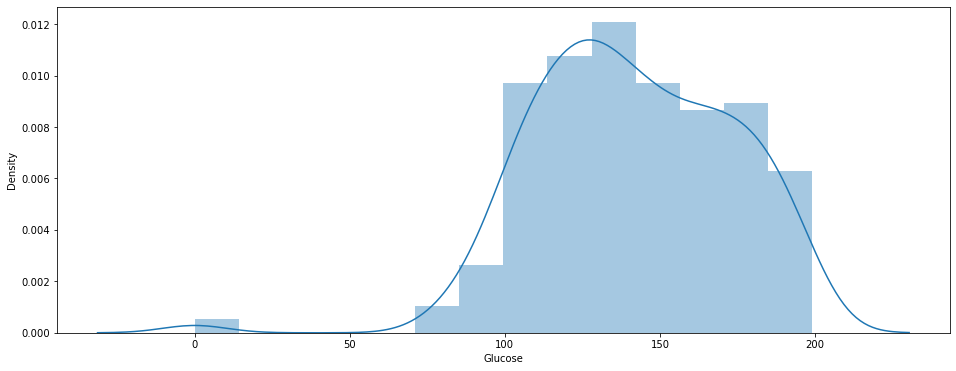

In [15]:
fig=plt.figure(figsize=(16,6))
sns.distplot(d['Glucose'][d['Outcome']==1])

<AxesSubplot:xlabel='BloodPressure', ylabel='Density'>

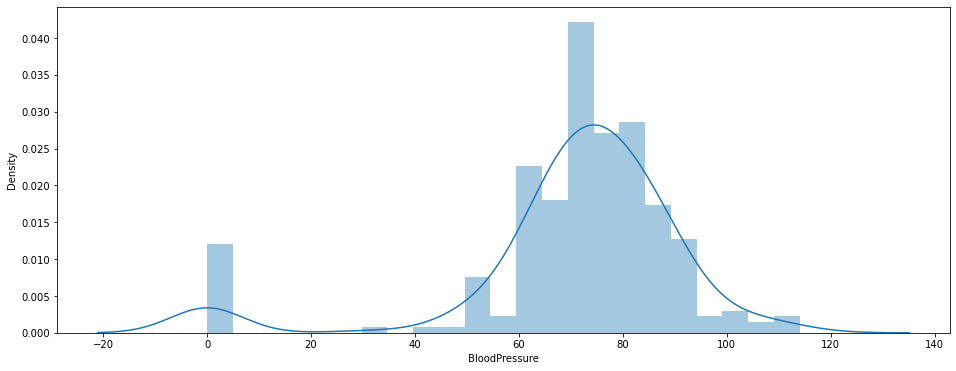

In [16]:
fig=plt.figure(figsize=(16,6))
sns.distplot(d['BloodPressure'][d['Outcome']==1])

<AxesSubplot:xlabel='SkinThickness', ylabel='Density'>

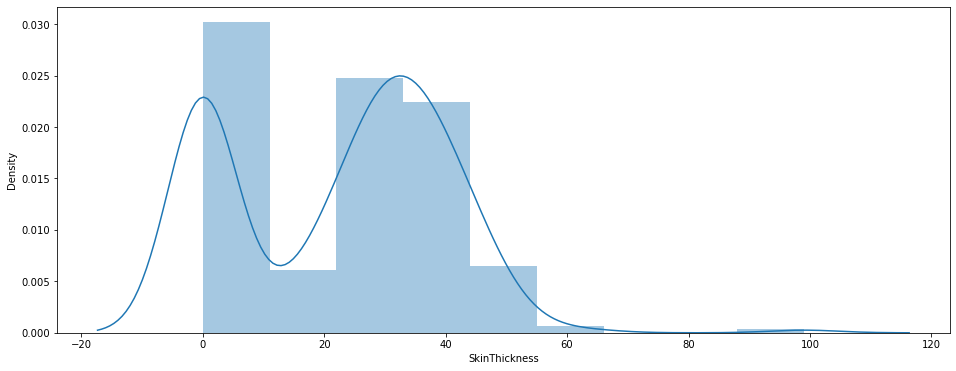

In [17]:
fig=plt.figure(figsize=(16,6))
sns.distplot(d['SkinThickness'][d['Outcome']==1])

<AxesSubplot:xlabel='Insulin', ylabel='Density'>

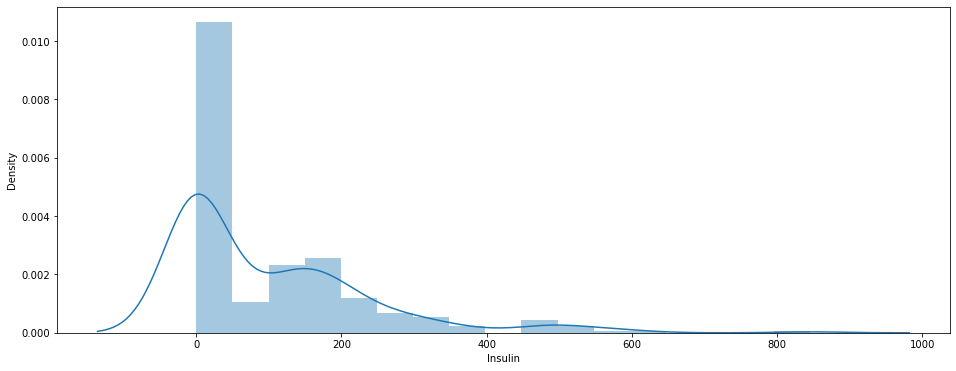

In [18]:
fig=plt.figure(figsize=(16,6))
sns.distplot(d['Insulin'][d['Outcome']==1])

<AxesSubplot:xlabel='BMI', ylabel='Density'>

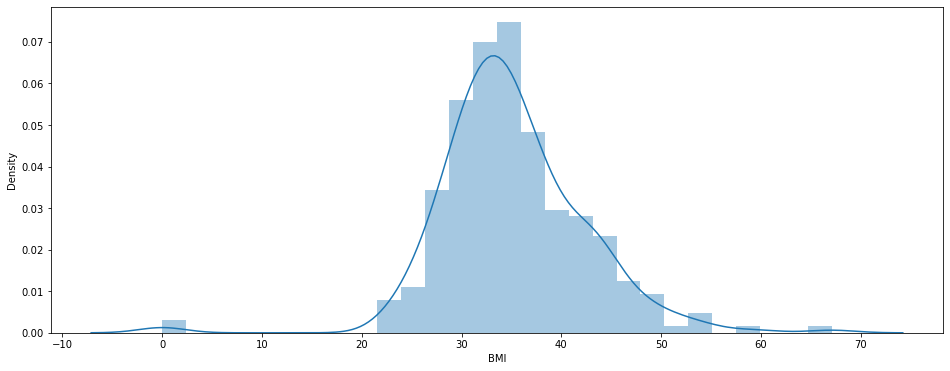

In [19]:
fig=plt.figure(figsize=(16,6))
sns.distplot(d['BMI'][d['Outcome']==1])

<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Density'>

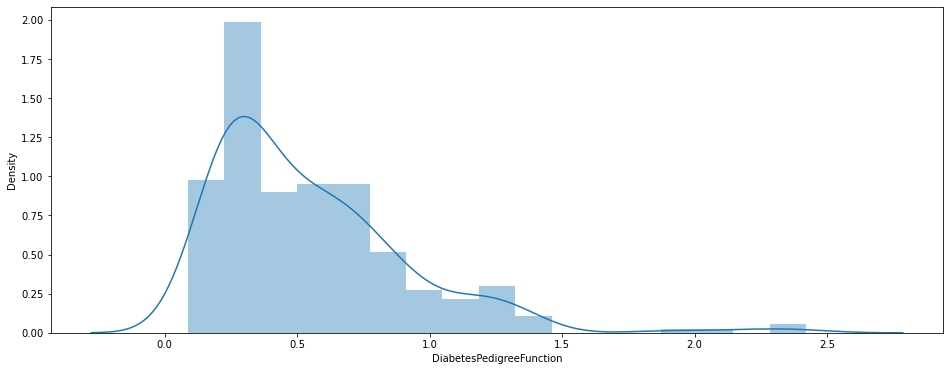

In [20]:
fig=plt.figure(figsize=(16,6))
sns.distplot(d['DiabetesPedigreeFunction'][d['Outcome']==1])

<AxesSubplot:xlabel='Age', ylabel='Density'>

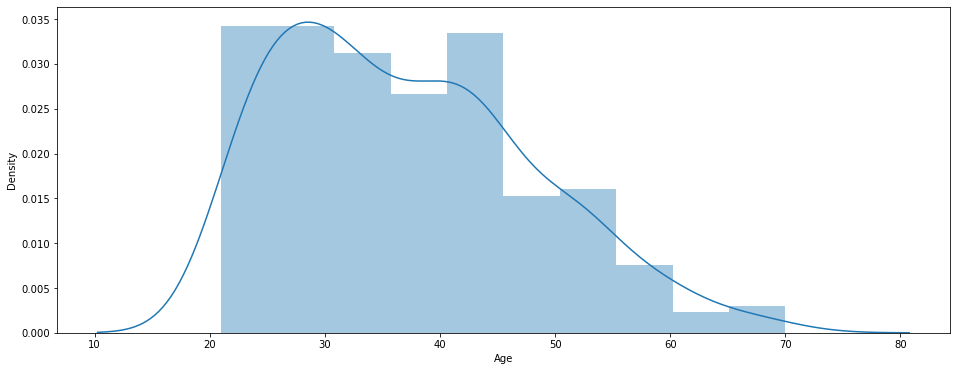

In [21]:
fig=plt.figure(figsize=(16,6))
sns.distplot(d['Age'][d['Outcome']==1])

# Data Preprocessing


#  Data Cleaning

Handling missing values in the variables

In [22]:
d.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [23]:
non_zero_list=np.count_nonzero(d,axis=0)
for i in range(0,len(d.columns)):
    print(d.columns[i] ,len(d)-non_zero_list[i])
    

Pregnancies 111
Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11
DiabetesPedigreeFunction 0
Age 0
Outcome 500


Rows having zeroes in atleast one of the columns [ 'Glucose','BloodPressure' and 'BMI'] are deleted as they may lead to improper training of the model.

In [25]:
d=d[((d.Glucose!=0) & (d.BloodPressure!=0) & (d.BMI!=0) )]
d.shape

(724, 9)

'Skin Thickness' and 'Insulin' columns are having maximum number of zeroes in their rows.
Deleting all the rows having having zero in one these columns would result in decreasing the size of data abruptly.
Instead, it is better to replace the zero value with one of the central tendency measures(mean,median,etc) of the attributes correspondingly

In [27]:
def nullify(value):
    if(value==0):
        return None
    else:
        return value

d['Insulin']=d['Insulin'].map(nullify)
d['SkinThickness']=d['SkinThickness'].map(nullify)

In [28]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
cols=['SkinThickness','Insulin']
d[cols]=imputer.fit_transform(d[cols])

# Correlation and Multicollinearity

In [29]:
k=d.corr()

In [30]:
corr_list=[[i,j] for i in k for j in k if i!=j and abs(k[i][j])>0.5 ]
corr_list

[['Pregnancies', 'Age'],
 ['SkinThickness', 'BMI'],
 ['BMI', 'SkinThickness'],
 ['Age', 'Pregnancies']]

Handling multicollinearity by removing columns 'Pregnancies' and 'SkinThickness'as they are correlated to columns 'Age' and 'BMI' correspondingly. 

In [31]:
d=d.drop(columns=['Pregnancies','SkinThickness'])

Separating class label (target variable) and independent variables

In [32]:
X=d.drop(columns=['Outcome'])
Y=d['Outcome']

# Scaling the dataset

In [33]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)
X=pd.DataFrame(data=X,columns=d.drop(columns=['Outcome']).columns)
X.head()

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.849933,-0.032378,-0.186619,0.164562,0.458421,1.416075
1,-1.200262,-0.517370,-0.186619,-0.852262,-0.372691,-0.199947
2,1.988930,-0.679035,-0.186619,-1.331622,0.593928,-0.114893
3,-1.070091,-0.517370,-0.541941,-0.634371,-0.926765,-1.050485
4,0.491962,-2.619006,0.292783,1.544537,5.460146,-0.029839


# Train and Test data partitions

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=100)

# Implementing the model

Logistic Regression model

In [36]:
from sklearn.linear_model import LogisticRegression as LR
classifierLR=LR()
classifierLR.fit(x_train,y_train)

LogisticRegression()

Decision Tree model

In [38]:
from sklearn.tree import DecisionTreeClassifier as DTC
classifierDTC=DTC()
classifierDTC.fit(x_train,y_train)

DecisionTreeClassifier()

Random Forest model

In [39]:
from sklearn.ensemble import RandomForestClassifier as RFC
classifierRFC=RFC()
classifierRFC.fit(x_train,y_train)

RandomForestClassifier()

Generating predictions

Logistic Regression model

In [41]:
predictionsLR=classifierLR.predict(x_test)

Decision Tree model

In [42]:
predictionsDTC=classifierDTC.predict(x_test)

Random Forest model

In [44]:
predictionsRFC=classifierRFC.predict(x_test)

# Evaluation metrics

Logistic Regression model

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictionsLR))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        99
           1       0.77      0.74      0.76        46

    accuracy                           0.85       145
   macro avg       0.83      0.82      0.82       145
weighted avg       0.85      0.85      0.85       145



Accuracy

In [47]:
classifierLR.score(x_test,y_test)

0.8482758620689655

Decision Tree model

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictionsDTC))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77        99
           1       0.53      0.63      0.57        46

    accuracy                           0.70       145
   macro avg       0.67      0.68      0.67       145
weighted avg       0.72      0.70      0.71       145



Accuracy

In [49]:
classifierDTC.score(x_test,y_test)

0.7034482758620689

Random Forest model

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictionsRFC))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88        99
           1       0.74      0.70      0.72        46

    accuracy                           0.83       145
   macro avg       0.80      0.79      0.80       145
weighted avg       0.83      0.83      0.83       145



Accuracy

In [51]:
classifierRFC.score(x_test,y_test)

0.8275862068965517

# Hyperparameter tuning the Random Forest

Default parameters of a Random Forest Classifier

In [52]:
classifierRFC.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [53]:
from sklearn.metrics import f1_score 
def cal_score(model,x1,y1,x2,y2):
    model.fit(x1,y1)
    predict=model.predict(x1)
    f1 = f1_score(y1,predict)
    predict = model.predict(x2)
    f2 = f1_score(y2,predict)
    return f1, f2

In [54]:
def effect(train_score,test_score,x_axis,title):
    plt.figure(figsize=(7,4),dpi=120)
    plt.plot(x_axis,train_score,color='red',label='train_score')
    plt.plot(x_axis,test_score,color='green',label='test_score')
    plt.title(title)
    plt.legend()
    plt.xlabel('Parameter value')
    plt.ylabel('F score')
    plt.show()

Max depth parameter

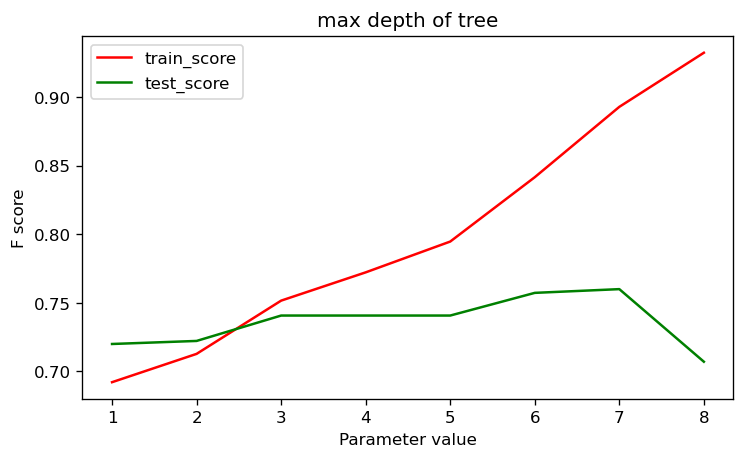

In [55]:
maxdepth = [i for i in range(1,9)]
train = []
test = []

for i in maxdepth:
    model = RFC(class_weight = 'balanced_subsample',
              n_jobs = -1,
              max_depth = i,
              random_state = 100,
               )
    f1, f2 = cal_score(model, x_train, y_train, x_test, y_test)
    train.append(f1)
    test.append(f2)
effect( train, test, maxdepth , 'max depth of tree')

Best max depth value is 7

n_estimators(Number of estimators of Random Forest) parameter

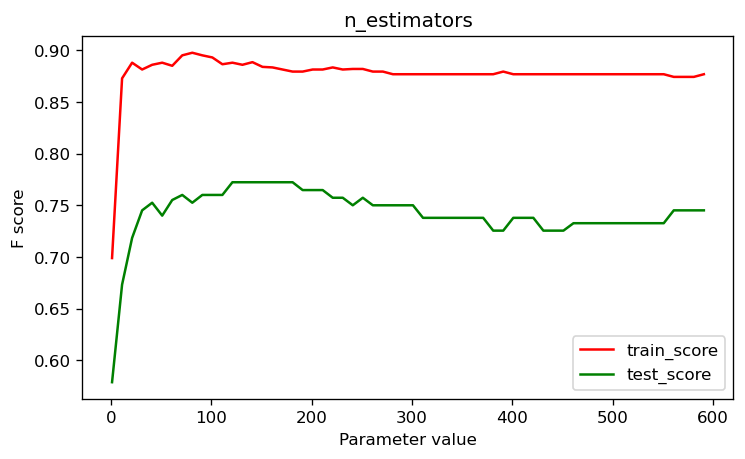

In [57]:
estimators = [i for i in range(1,600,10)]
train = []
test = []

for i in estimators:
    model = RFC(class_weight = 'balanced_subsample',
              n_estimators = i,
              n_jobs = -1,
              max_depth = 7,
              random_state = 100)
    f1, f2 = cal_score(model, x_train, y_train, x_test, y_test)
    train.append(f1)
    test.append(f2)
effect( train, test, range(1,600,10) , 'n_estimators')

Number of estimators value at which maximum accuracy possible is 120

Max samples parameter

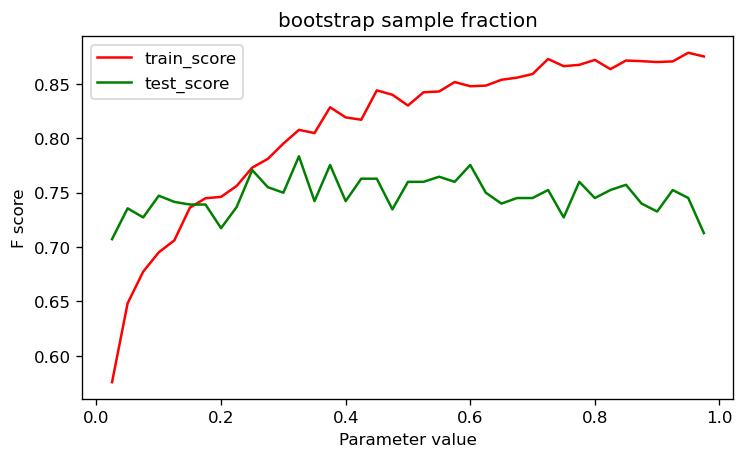

In [58]:
maxsamples = [i/40 for i in range(1,40)]
train = []
test = []

for i in maxsamples:  
  model = RFC(class_weight = 'balanced_subsample', n_estimators = 120,
              n_jobs = -1, max_depth = 7, random_state = 100, max_samples = i)
  f1, f2 = cal_score(model, x_train, y_train, x_test, y_test)
  train.append(f1)
  test.append(f2)
effect( train, test, maxsamples , 'bootstrap sample fraction')

Bootstrap sample fraction at which better accuracy may occur is 0.22

Max features parameter

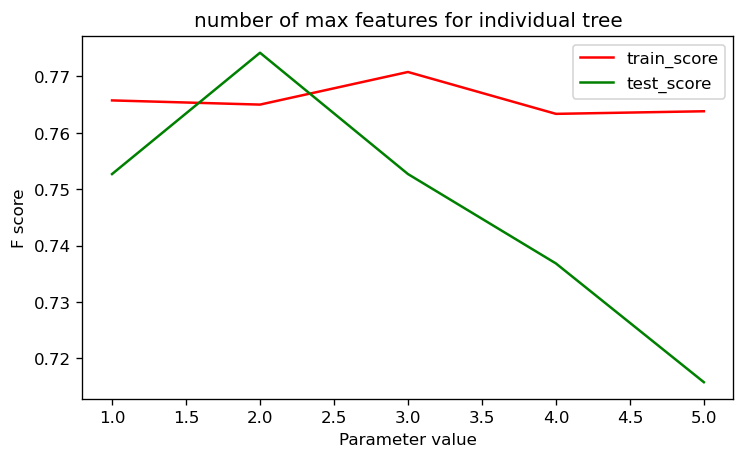

In [60]:
maxfeatures = range(1,X.shape[1])
train = []
test = []

for i in maxfeatures:  
  model = RFC(class_weight = 'balanced_subsample', n_estimators = 120,
              n_jobs = -1, max_depth = 7, random_state = 100,max_samples=0.22, max_features = i)
  f1, f2 = cal_score(model, x_train, y_train, x_test, y_test)
  train.append(f1)
  test.append(f2)
effect( train, test, maxfeatures , 'number of max features for individual tree')

Min samples split parameter

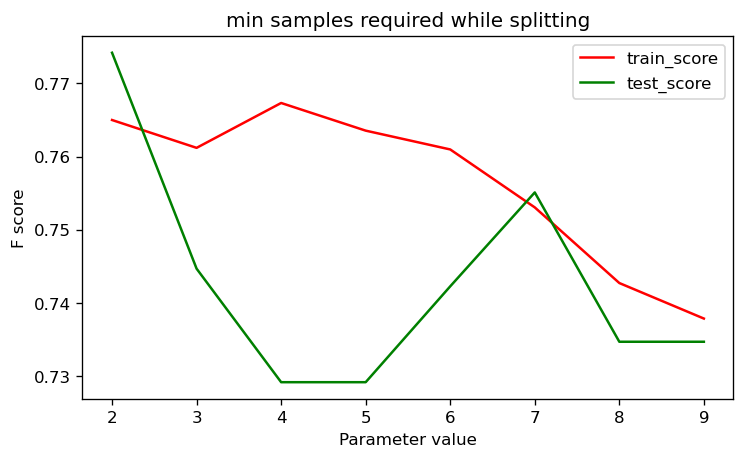

In [62]:
minsamplessplit = [i for i in range(2,10)]
train = []
test = []

for i in minsamplessplit:
    model = RFC(class_weight = 'balanced_subsample',
              n_estimators = 120,
              n_jobs = -1,
              max_depth = 7,
              random_state = 100,
               max_features = 2,
                max_samples = 0.22,
                min_samples_split=i
               )
    f1, f2 = cal_score(model, x_train, y_train, x_test, y_test)
    train.append(f1)
    test.append(f2)
effect( train, test, minsamplessplit , 'min samples required while splitting')

min_samples_split is already 2 by default

After Hyperparameter tuning the Random Forest,tuned parameters are:
    max_depth=7,
    max_features=2,
    max_samples=0.22,
    n_estimators=120

Implementing obtained parameters from Hyperparameter tuning

Fitting the model

In [68]:
classifierRFC=RFC(class_weight = 'balanced_subsample',n_estimators=120, n_jobs=-1, max_depth=7,
               random_state=100,max_samples=0.22,max_features=2,min_samples_split=2)
classifierRFC.fit(x_train,y_train) 
predictionsRFC=classifierRFC.predict(x_test)

Accuracy

In [69]:
classifierRFC.score(x_test,y_test)

0.8551724137931035

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictionsRFC))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89        99
           1       0.77      0.78      0.77        46

    accuracy                           0.86       145
   macro avg       0.83      0.84      0.83       145
weighted avg       0.86      0.86      0.86       145



Hyperparameter tuning the Random Forest has increased the Accuracy of the model.

Normal Random Forest classifier accuracy is 0.8275862068965517.

Logistic Regression model accuracy is 0.8482758620689655.

Decision Tree model accuracy is 0.7034482758620689.

Random Forest model with Hyperparameter tuning gives maximum accuaracy of 0.8551724137931035.